## Week 6 goals:

1. Undersampling for `stress_category`
2. Undersampling for `orientaion`
3. Check coefficient for `Agreeableness` according to age groups
4. n_estimators: [100,500,1000] for the 1st time, then go deeper.
5. Solve overfitting
6. KFold Cross Validation: take cv = [3,10]
7. Group `familysize` and `personality`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold

## Data Preprocessing

In [4]:
data = pd.read_csv('data.csv',sep='\t')

In [5]:
data['stress_score'] = data.apply(lambda row: row.Q1A + row.Q6A + row.Q8A + row.Q11A + row.Q12A + row.Q14A
                                       + row.Q18A + row.Q22A + row.Q27A + row.Q29A + row.Q32A + row.Q33A + row.Q35A + row.Q39A,
                                       axis=1)

In [6]:
data['stress_category'] = data["stress_score"]

In [7]:
data.loc[ data['stress_category'] <= 28, 'stress_category'] = 1
data.loc[(data['stress_category'] > 28) & (data['stress_category'] <= 32), 'stress_category'] = 2
data.loc[(data['stress_category'] > 32) & (data['stress_category'] <= 39), 'stress_category'] = 3
data.loc[(data['stress_category'] > 39) & (data['stress_category'] <= 47), 'stress_category'] = 4
data.loc[ data['stress_category'] > 47, 'stress_category'] = 5 

In [8]:
data['anxiety_score'] = data.apply(lambda row: row.Q2A + row.Q4A + row.Q7A + row.Q9A + row.Q15A + row.Q19A
                                       + row.Q20A + row.Q23A + row.Q25A + row.Q28A + row.Q30A + row.Q36A + row.Q40A + row.Q41A,
                                       axis=1)

In [9]:
data['anxiety_category'] = data['anxiety_score']

In [10]:
data.loc[ data['anxiety_category'] <= 21, 'anxiety_category'] = 1
data.loc[(data['anxiety_category'] > 21) & (data['anxiety_category'] <= 23), 'anxiety_category'] = 2
data.loc[(data['anxiety_category'] > 23) & (data['anxiety_category'] <= 28), 'anxiety_category'] = 3
data.loc[(data['anxiety_category'] > 28) & (data['anxiety_category'] <= 33), 'anxiety_category'] = 4
data.loc[ data['anxiety_category'] > 33, 'anxiety_category'] = 5 

In [11]:
data['depression_score'] = data.apply(lambda row: row.Q3A + row.Q5A + row.Q10A + row.Q13A + row.Q16A + row.Q17A
                                       + row.Q21A + row.Q24A + row.Q26A + row.Q31A + row.Q34A + row.Q37A + row.Q38A + row.Q42A,
                                       axis=1)

In [12]:
data['depression_category'] = data['depression_score']

In [13]:
data.loc[ data['depression_category'] <= 23, 'depression_category'] = 1
data.loc[(data['depression_category'] > 23) & (data['depression_category'] <= 27), 'depression_category'] = 2
data.loc[(data['depression_category'] > 27) & (data['depression_category'] <= 34), 'depression_category'] = 3
data.loc[(data['depression_category'] > 34) & (data['depression_category'] <= 41), 'depression_category'] = 4
data.loc[ data['depression_category'] > 41, 'depression_category'] = 5 

In [14]:
data['Extroversion'] = data.apply(lambda row: row.TIPI1 + 
                                  (7-row.TIPI6), axis=1)

In [15]:
data['Agreeableness'] = data.apply(lambda row: row.TIPI7 + 
                                   (7-row.TIPI2), axis=1)

In [16]:
data['Conscientiousness'] = data.apply(lambda row: row.TIPI3 + 
                                       (7-row.TIPI8), axis=1)

In [17]:
data['Emotional_stability'] = data.apply(lambda row: row.TIPI9 + 
                                         (7-row.TIPI4), axis=1)

In [18]:
data['Openness_to_experience'] = data.apply(lambda row: row.TIPI5 + 
                                            (7-row.TIPI10), axis=1)

In [19]:
data = data[data.TIPI1 != 0]
data = data[data.TIPI2 != 0]
data = data[data.TIPI3 != 0]
data = data[data.TIPI4 != 0]
data = data[data.TIPI5 != 0]
data = data[data.TIPI6 != 0]
data = data[data.TIPI7 != 0]
data = data[data.TIPI8 != 0]
data = data[data.TIPI9 != 0]
data = data[data.TIPI10 != 0]

In [20]:
data['depression_score'] = data['depression_score']-14
data['anxiety_score'] = data['anxiety_score']-14
data['stress_score'] = data['stress_score']-14

In [21]:
data.loc[data['religion']==5,'religion'] = 4
data.loc[data['religion']==6,'religion'] = 4
data.loc[data['religion']==7,'religion'] = 4

In [22]:
data = data[data.VCL6 != 1]
data = data[data.VCL9 != 1]
data = data[data.VCL12 != 1]

In [23]:
data['education_yrs'] = data['education']

In [24]:
data.loc[data['education_yrs'] == 1,'education_yrs'] = 8
data.loc[data['education_yrs'] == 2,'education_yrs'] = 12
data.loc[data['education_yrs'] == 3,'education_yrs'] = 16
data.loc[data['education_yrs'] == 4,'education_yrs'] = 19

In [25]:
data.loc[data['age']==1996,'age'] = 22
data.loc[data['age']==1998,'age'] = 20
data.loc[data['age']==1993,'age'] = 25
data.loc[data['age']==1991,'age'] = 27

data = data[data.age != 223]
data = data[data.age != 115]
data = data[data.age != 117]

In [26]:
data = data[data.familysize <= 30]

In [27]:
data = data[data.education != 0]

In [28]:
data = data[data.urban != 0]

In [29]:
data = data[data.gender != 0]
data = data[data.gender != 3]

In [30]:
data = data[data.hand != 0]

In [31]:
data = data[data.religion != 0]

In [32]:
data = data[data.orientation != 0]
data = data[data.orientation != 5]

In [33]:
data = data[data.race != 70]

In [34]:
data = data[data.married != 0]

In [35]:
data = data[data.familysize != 0]

In [36]:
data.loc[data['orientation']== 1, 'orientation'] = 0

In [37]:
data.loc[data['orientation']== 2, 'orientation'] = 1
data.loc[data['orientation']== 3, 'orientation'] = 1
data.loc[data['orientation']== 4, 'orientation'] = 1

In [38]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,anxiety_score,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs
0,4,28,3890,4,25,2122,2,16,1944,4,...,34,5,27,4,1,9,9,1,13,12
2,3,7,5784,1,33,4373,4,41,3242,1,...,12,3,39,5,3,7,4,8,10,12
4,2,36,3215,2,13,7731,3,5,4156,4,...,40,5,32,5,4,7,4,4,9,16
6,1,20,4325,1,34,4009,2,38,3604,3,...,19,4,31,5,7,8,10,7,5,12
9,3,38,5187,2,28,2600,4,9,2015,1,...,28,5,42,5,1,1,10,1,5,8


In [39]:
data.loc[data['depression_category']<=3,'depression_category'] = 0
data.loc[data['depression_category']>=4,'depression_category'] = 1

In [40]:
data.loc[data['anxiety_category']<=3,'anxiety_category'] = 0
data.loc[data['anxiety_category']>=4,'anxiety_category'] = 1

In [41]:
data.loc[data['stress_category']<=3,'stress_category'] = 0
data.loc[data['stress_category']>=4,'stress_category'] = 1

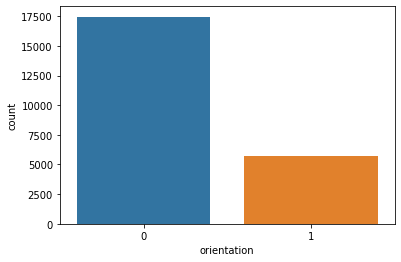

In [42]:
sns.countplot(data['orientation'])

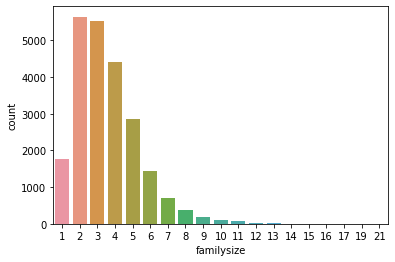

In [43]:
sns.countplot(data['familysize'])

In [44]:
data.loc[data['familysize']<=3,'familysize'] = 0
data.loc[data['familysize']>=4,'familysize'] = 1

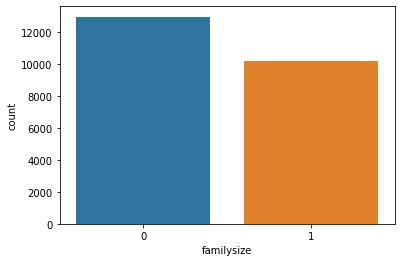

In [45]:
sns.countplot(data['familysize'])

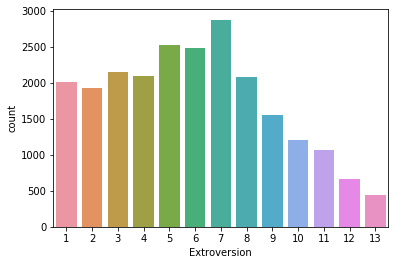

In [46]:
sns.countplot(data['Extroversion'])

In [47]:
data.loc[data['Extroversion']<=5,'Extroversion'] = 0
data.loc[(data['Extroversion']>=6)&(data['Extroversion']<=10),'Extroversion'] = 1
data.loc[data['Extroversion']>=11,'Extroversion'] = 2

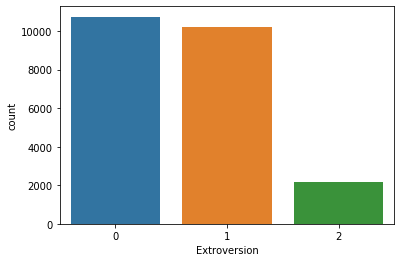

In [48]:
sns.countplot(data['Extroversion'])

In [49]:
data.loc[data['Agreeableness']<=5,'Agreeableness'] = 0
data.loc[(data['Agreeableness']>=6)&(data['Agreeableness']<=10),'Agreeableness'] = 1
data.loc[data['Agreeableness']>=11,'Agreeableness'] = 2


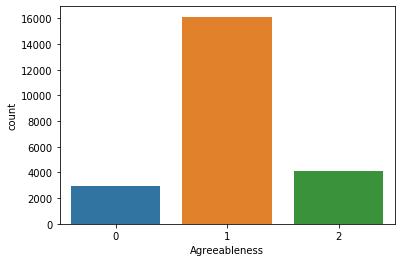

In [50]:
sns.countplot(data['Agreeableness'])

In [51]:
data.loc[data['Conscientiousness']<=5,'Conscientiousness'] = 0
data.loc[(data['Conscientiousness']>=6)&(data['Conscientiousness']<=10),'Conscientiousness'] = 1
data.loc[data['Conscientiousness']>=11,'Conscientiousness'] = 2

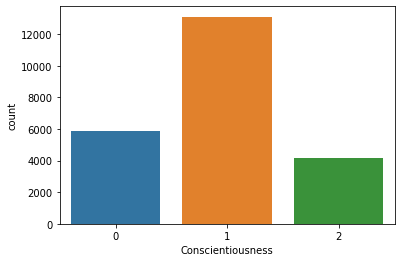

In [52]:
sns.countplot(data['Conscientiousness'])

In [53]:
data.loc[data['Emotional_stability']<=5,'Emotional_stability'] = 0
data.loc[(data['Emotional_stability']>=6)&(data['Emotional_stability']<=10),'Emotional_stability'] = 1
data.loc[data['Emotional_stability']>=11,'Emotional_stability'] = 2

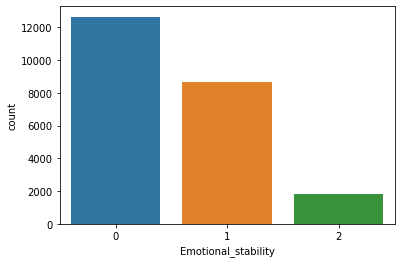

In [54]:
sns.countplot(data['Emotional_stability'])

In [55]:
data.loc[data['Openness_to_experience']<=5,'Openness_to_experience'] = 0
data.loc[(data['Openness_to_experience']>=6)&(data['Openness_to_experience']<=10),'Openness_to_experience'] = 1
data.loc[data['Openness_to_experience']>=11,'Openness_to_experience'] = 2

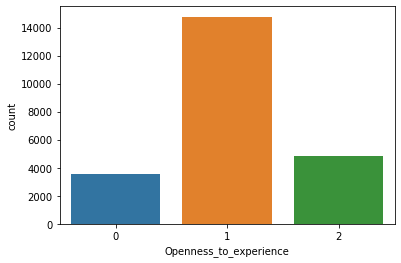

In [56]:
sns.countplot(data['Openness_to_experience'])

## 1. Undersampling for Stress

In [57]:
data_u = data.copy()

In [58]:
data_u.shape

(23150, 184)

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
features = ['age','gender','religion', 'orientation', 'race',
            'familysize','anxiety_category','depression_category',
           'Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience', 'education_yrs' ]

target = 'stress_category'

In [61]:
rus = RandomUnderSampler()
X_rus, y_rus= rus.fit_sample(data_u[features], data_u[target])

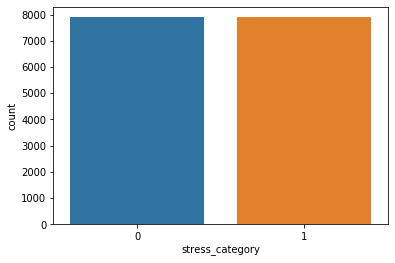

In [62]:
sns.countplot(y_rus)

In [63]:
X_rus['stress_category'] = y_rus

In [64]:
X_rus.head()

,age,gender,religion,orientation,race,familysize,anxiety_category,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,stress_category
0,22,2,10,0,10,1,0,0,1,1,1,0,0,16,0
1,26,1,10,0,10,1,0,0,0,1,1,1,2,16,0
2,17,2,10,0,10,1,0,0,2,2,1,1,1,12,0
3,26,2,10,0,10,1,1,1,0,1,1,1,1,19,0
4,21,2,10,0,10,1,1,0,0,1,0,2,1,16,0


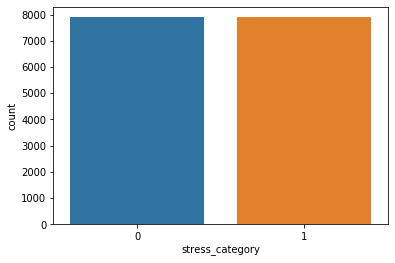

In [65]:
sns.countplot(X_rus['stress_category'])

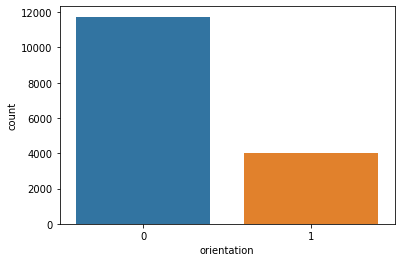

In [66]:
sns.countplot(X_rus['orientation'])

## 3. Check Agreeableness according to age groups

In [67]:
data_u.loc[data_u['age']<=20, 'age'] = 0
data_u.loc[data_u['age']>=21, 'age'] = 1

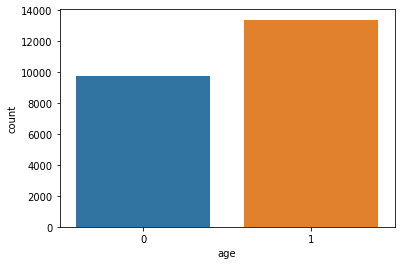

In [68]:
sns.countplot(data_u['age'])

In [69]:
X_rus.loc[X_rus['age']<=20, 'age'] = 0
X_rus.loc[X_rus['age']>=21, 'age'] = 1

In [70]:
features = ['gender','religion','orientation','race',
            'familysize','anxiety_category','depression_category',
            'stress_category','Extroversion','Agreeableness', 
            'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience', 'education_yrs' ]

target = 'age'

In [71]:
rus = RandomUnderSampler()
X_age, y_age= rus.fit_sample(data_u[features], data_u[target])

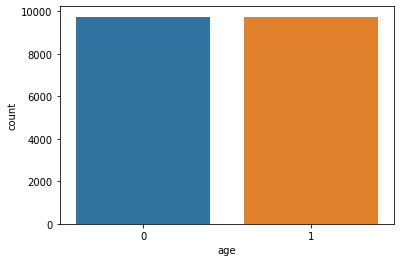

In [72]:
sns.countplot(y_age)

This is the distribution of `orientation` when age group is balanced (boundary = 20). 

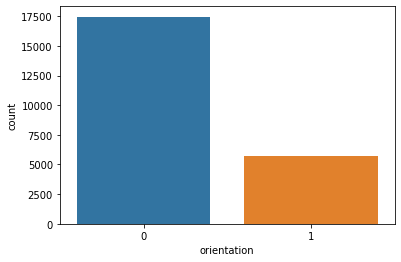

In [73]:
sns.countplot(data_u['orientation'])

In [74]:
def train_model(dataset,model_name,feature,target):
    dict_m = {
        "log_reg": LogisticRegression(),
        "rf": RandomForestClassifier()
    }
    

    X_train,X_test,y_train,y_test = train_test_split(dataset[feature],
                                                    dataset[target],
                                                    test_size=0.3)
    
    model= dict_m[model_name]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    if model_name == "log_reg":
        coeff_df = pd.DataFrame(np.transpose(model.coef_), 
                            X_train.columns, columns=['Coefficient']),
    else:
        coeff_df = pd.DataFrame(np.transpose(model.feature_importances_), 
                            X_train.columns, columns=['Coefficient']),

    score = accuracy_score(y_pred,y_test)
    matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(matrix,annot=True,cmap="YlGnBu")
    plt.show()

    print('Accuracy: {}'.format(score))
    return coeff_df, matrix

In [75]:
features = ['age','gender','orientation',
            'familysize','anxiety_category','depression_category',
           'Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience' ]

target = 'stress_category'

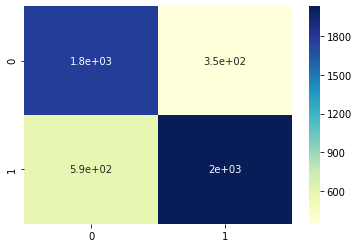

Accuracy: 0.8024065864471184


In [76]:
coeff1, matrix1 = train_model(X_rus,"log_reg",features,target)

In [77]:
coeff1

(                        Coefficient
 age                        0.173934
 gender                     0.397965
 orientation               -0.004723
 familysize                -0.113052
 anxiety_category           1.958686
 depression_category        1.728896
 Extroversion               0.071823
 Agreeableness             -0.362587
 Conscientiousness          0.104310
 Emotional_stability       -1.157452
 Openness_to_experience     0.011439,)

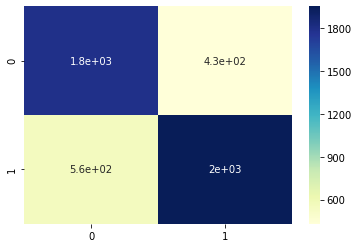

Accuracy: 0.7912180705087608


In [78]:
coeff2, matrix2 = train_model(X_rus,"rf",features,target)

***Note***: Feature Importance does not have a positive/negative direction.

In [79]:
coeff2

(                        Coefficient
 age                        0.034775
 gender                     0.026747
 orientation                0.033178
 familysize                 0.033769
 anxiety_category           0.274849
 depression_category        0.224578
 Extroversion               0.055910
 Agreeableness              0.054813
 Conscientiousness          0.059095
 Emotional_stability        0.140385
 Openness_to_experience     0.061903,)

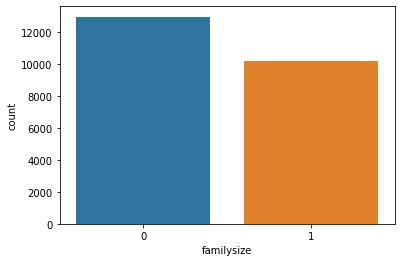

In [80]:
sns.countplot(data_u.familysize)

In [81]:
def grid_search(dataset,feature,target,dict_param, model_name, cv):
    
    
    dict_m = {
        "log_reg": LogisticRegression(),
        "rf": RandomForestClassifier()
    }
    
    X_train,X_test,y_train,y_test = train_test_split(dataset[feature],
                                                    dataset[target],
                                                    test_size=0.3)
    
    model = RandomizedSearchCV(estimator = dict_m[model_name], 
                               param_distributions = dict_param, n_iter = 100,
                               cv = cv, verbose=2, random_state=42, n_jobs = -1)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    coeff = model.best_params_
    
    score = accuracy_score(y_pred,y_test)
    matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(matrix,annot=True,cmap="YlGnBu")
    plt.show()

    print('Accuracy: {}'.format(score))
    return coeff, matrix


In [82]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.9min finished


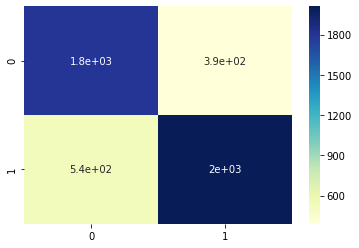

Accuracy: 0.8043065231158961


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1800,  390],
        [ 537, 2010]]))

In [83]:
grid_search(X_rus,features,target,random_grid,"rf",3)

In [84]:
def params_test(dataset,feature,target,param,param_list,model_name,cv):
    
    dict_m = {
        "log_reg": LogisticRegression(),
        "rf": RandomForestClassifier()
    }
    
    X_train,X_test,y_train,y_test = train_test_split(dataset[feature],
                                                    dataset[target],
                                                    test_size=0.3)
    
    train_scoreNum, test_scoreNum = validation_curve(dict_m[model_name],
                                                X=X_train, y=y_train,
                                                param_name= param,
                                                param_range= param_list,
                                                cv=cv)

    plt.plot(param_list, train_scoreNum,label='Train_score')
    plt.plot(param_list, test_scoreNum,label='Test_score')
    plt.legend()
    plt.title("Accuracy vs. {}".format(param))
    plt.show()

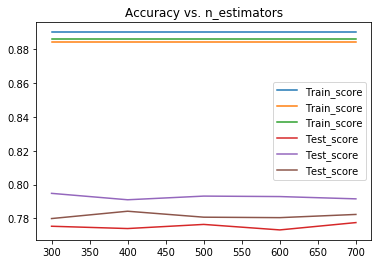

In [85]:
params_test(X_rus,features,target,"n_estimators",[300,400,500,600,700],"rf",3)

Turn all the functions here into a `class`: since they share several parmeters: dict_m, dataset split, etc.

Still need to solve the overfitting problem.

In [86]:
def kfold_cv(dataset, features, target, model_name):
    
    dict_m = {
        "log_reg": LogisticRegression(),
        "rf": RandomForestClassifier()
    }
    
    model = dict_m[model_name]
    scores = []

    
    cv = KFold(n_splits=10, random_state=42, shuffle=False)

    for train_index, test_index in cv.split(dataset):

        X_train = dataset.iloc[train_index][features]
        X_test = dataset.iloc[test_index][features]
        y_train = dataset.iloc[train_index][target]
        y_test = dataset.iloc[test_index][target]

        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    plt.plot(range(len(scores)), scores)
    plt.title("Cross Validation Scores")
    plt.show()
    
    return scores

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


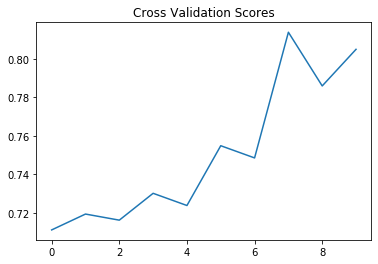

[0.7112096263457884,
 0.7194426852438252,
 0.7162761241291957,
 0.7302089930335656,
 0.7238758708043065,
 0.7549081697276757,
 0.7485750474984167,
 0.8138062064597846,
 0.7859404686510449,
 0.8049398353388221]

In [87]:
kfold_cv(X_rus,features,target,"rf")

## 3. Redo Stress Models (Age Split = 20)

### (i) Personality

In [88]:
X_rus['age'].value_counts()

1    8877
0    6913
Name: age, dtype: int64

**Split dataframes according to age groups:**
* `0` represents younger than 20 yrs old.
* `1` represents older than 20 yrs old.

In [89]:
X_rus0 = X_rus[X_rus['age']==0]

In [90]:
X_rus1 = X_rus[X_rus['age']==1]

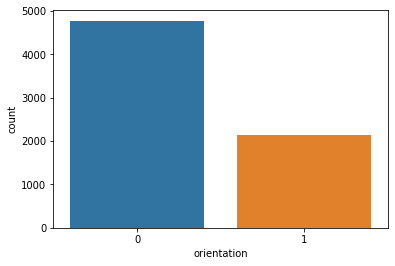

In [244]:
sns.countplot(X_rus0['orientation'])

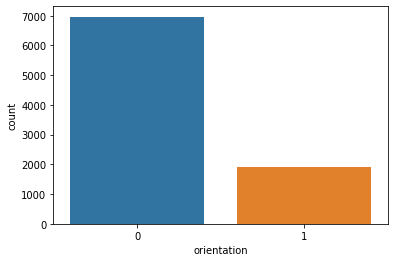

In [245]:
sns.countplot(X_rus1['orientation'])

#### Age Under 20

In [248]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience']

target = 'stress_category'

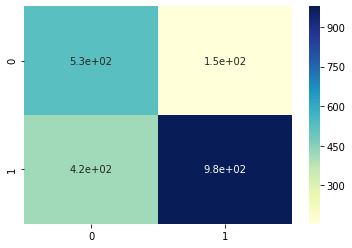

Accuracy: 0.7256509161041466


((                        Coefficient
  Extroversion              -0.180237
  Agreeableness             -0.287754
  Conscientiousness         -0.207314
  Emotional_stability       -1.704296
  Openness_to_experience    -0.169294,), array([[527, 154],
        [415, 978]]))

In [92]:
train_model(X_rus0,"log_reg",features,target)

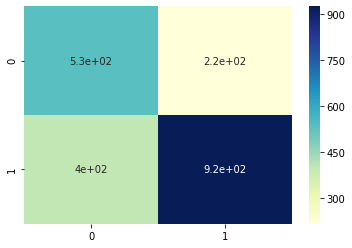

Accuracy: 0.7034715525554484


((                        Coefficient
  Extroversion               0.073855
  Agreeableness              0.067109
  Conscientiousness          0.070434
  Emotional_stability        0.715170
  Openness_to_experience     0.073432,), array([[534, 215],
        [400, 925]]))

In [93]:
train_model(X_rus0,"rf",features,target)

In [253]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.2min finished


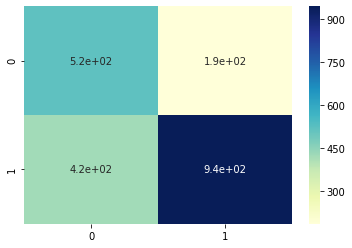

Accuracy: 0.7058823529411765


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[519, 186],
        [424, 945]]))

In [95]:
grid_search(X_rus0,features,target,random_grid,"rf",3)

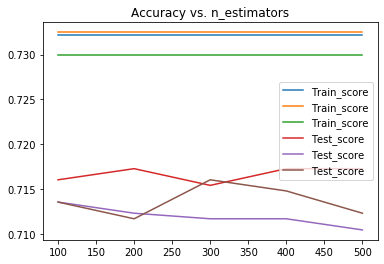

In [96]:
params_test(X_rus0,features,target,"n_estimators",[100,200,300,400,500],"rf",3)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


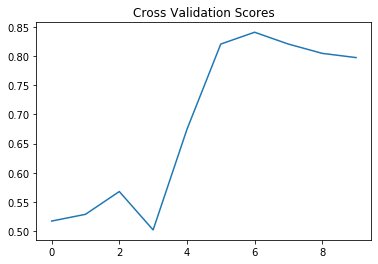

[0.5173410404624278,
 0.5289017341040463,
 0.5679190751445087,
 0.5021707670043415,
 0.6743849493487699,
 0.8205499276410999,
 0.8408104196816208,
 0.8205499276410999,
 0.804630969609262,
 0.7973950795947902]

In [97]:
kfold_cv(X_rus0,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.3min finished


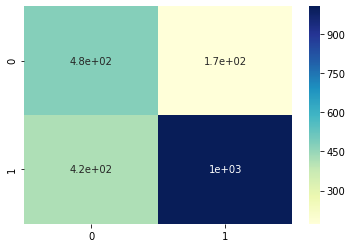

Accuracy: 0.7160077145612344


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 100},
 array([[ 477,  172],
        [ 417, 1008]]))

In [98]:
grid_search(X_rus0,features,target,random_grid,"rf",6)

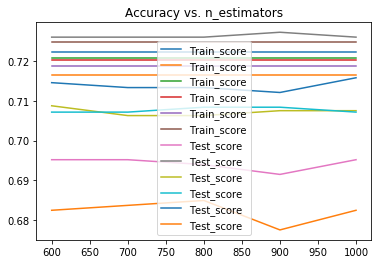

In [99]:
params_test(X_rus0,features,target,"n_estimators",[600,700,800,900,1000],"rf",6)

In [250]:
n_estimators = [800,850,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.7min finished


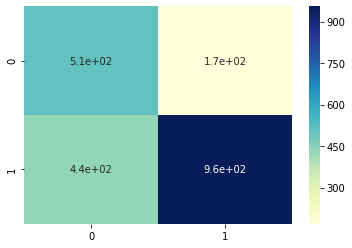

Accuracy: 0.7073288331726133


({'n_estimators': 850,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[512, 169],
        [438, 955]]))

In [251]:
grid_search(X_rus0,features,target,random_grid,"rf",6)

#### Age Above 20

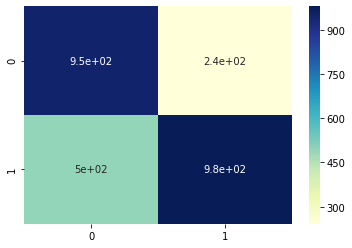

Accuracy: 0.7233483483483484


((                        Coefficient
  Extroversion              -0.209362
  Agreeableness             -0.239126
  Conscientiousness         -0.135887
  Emotional_stability       -1.705729
  Openness_to_experience    -0.160195,), array([[948, 242],
        [495, 979]]))

In [100]:
train_model(X_rus1,"log_reg",features,target)

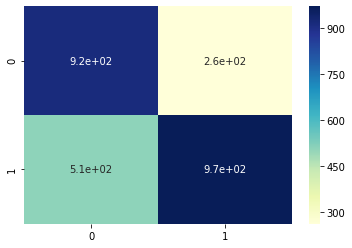

Accuracy: 0.7090840840840841


((                        Coefficient
  Extroversion               0.059197
  Agreeableness              0.055783
  Conscientiousness          0.088372
  Emotional_stability        0.727976
  Openness_to_experience     0.068672,), array([[917, 263],
        [512, 972]]))

In [101]:
train_model(X_rus1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


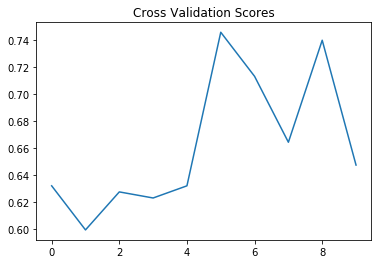

[0.6317567567567568,
 0.5990990990990991,
 0.6272522522522522,
 0.6227477477477478,
 0.6317567567567568,
 0.7454954954954955,
 0.7128378378378378,
 0.6640360766629086,
 0.7395715896279594,
 0.6471251409244645]

In [102]:
kfold_cv(X_rus1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.3min finished


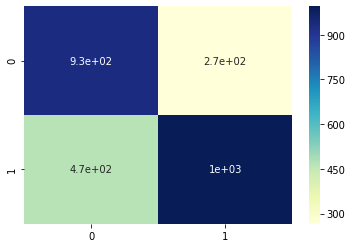

Accuracy: 0.7240990990990991


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[934, 266],
        [469, 995]]))

In [254]:
grid_search(X_rus1,features,target,random_grid,"rf",5)

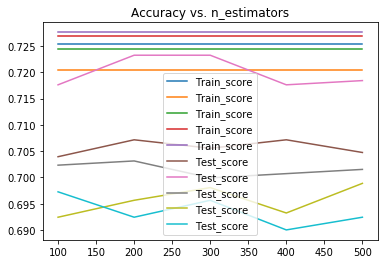

In [255]:
params_test(X_rus1,features,target,"n_estimators",[100,200,300,400,500],"rf",5)

In [256]:
n_estimators = [100,200,250,300,400]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


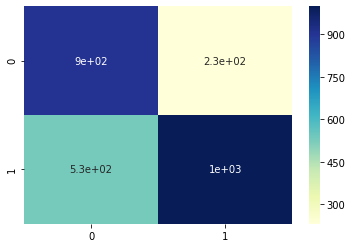

Accuracy: 0.7135885885885885


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[903, 231],
        [532, 998]]))

In [257]:
grid_search(X_rus1,features,target,random_grid,"rf",5)

### (ii) Orientation + Personality

In [269]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation']

target = 'stress_category'

#### Until 20

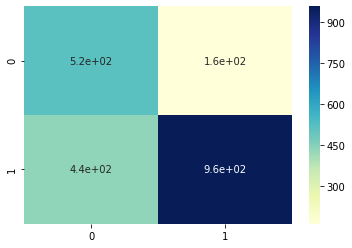

Accuracy: 0.7111861137897783


((                        Coefficient
  Extroversion              -0.165182
  Agreeableness             -0.290169
  Conscientiousness         -0.201313
  Emotional_stability       -1.794054
  Openness_to_experience    -0.111455
  orientation                0.081265,), array([[517, 162],
        [437, 958]]))

In [106]:
train_model(X_rus0,"log_reg",features,target)

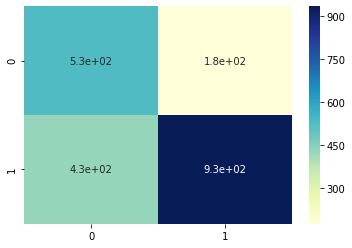

Accuracy: 0.7068466730954677


((                        Coefficient
  Extroversion               0.075850
  Agreeableness              0.085334
  Conscientiousness          0.084600
  Emotional_stability        0.629077
  Openness_to_experience     0.082271
  orientation                0.042869,), array([[533, 176],
        [432, 933]]))

In [107]:
train_model(X_rus0,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


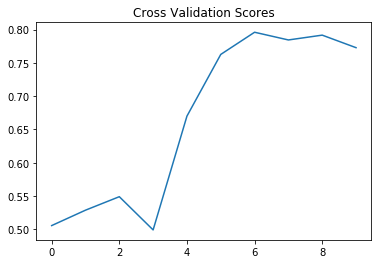

[0.5057803468208093,
 0.5289017341040463,
 0.5491329479768786,
 0.4992764109985528,
 0.6700434153400868,
 0.7626628075253257,
 0.7959479015918958,
 0.784370477568741,
 0.7916063675832128,
 0.7727930535455861]

In [108]:
kfold_cv(X_rus0,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.5min finished


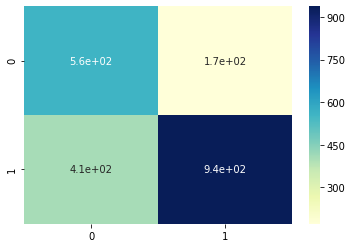

Accuracy: 0.7213114754098361


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 100},
 array([[559, 172],
        [406, 937]]))

In [109]:
grid_search(X_rus0,features,target,random_grid,"rf",6)

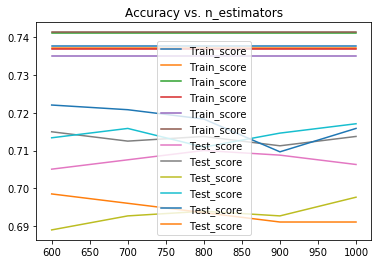

In [270]:
params_test(X_rus0,features,target,"n_estimators",[600,700,800,900,1000],"rf",6)

In [271]:
n_estimators = [600,650,700,750,800]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.9min finished


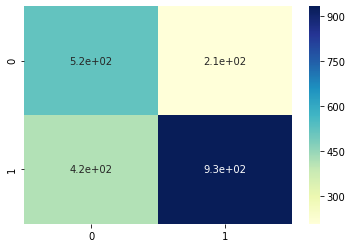

Accuracy: 0.6996142719382835


({'n_estimators': 700,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[520, 207],
        [416, 931]]))

In [272]:
grid_search(X_rus0,features,target,random_grid,"rf",6)

#### Above 20

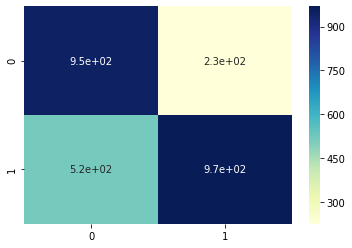

Accuracy: 0.71996996996997


((                        Coefficient
  Extroversion              -0.197700
  Agreeableness             -0.202102
  Conscientiousness         -0.090326
  Emotional_stability       -1.711711
  Openness_to_experience    -0.238647
  orientation                0.219355,), array([[949, 226],
        [520, 969]]))

In [111]:
train_model(X_rus1,"log_reg",features,target)

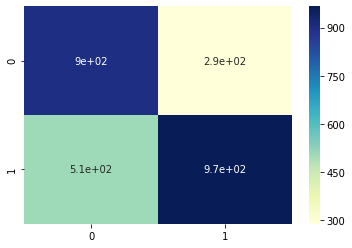

Accuracy: 0.7015765765765766


((                        Coefficient
  Extroversion               0.069375
  Agreeableness              0.072588
  Conscientiousness          0.088144
  Emotional_stability        0.661526
  Openness_to_experience     0.077928
  orientation                0.030439,), array([[903, 289],
        [506, 966]]))

In [112]:
train_model(X_rus1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


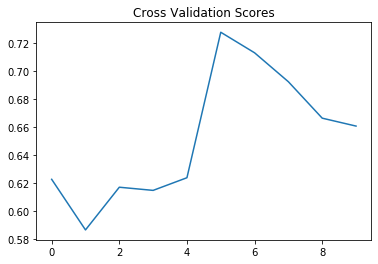

[0.6227477477477478,
 0.5867117117117117,
 0.6171171171171171,
 0.6148648648648649,
 0.6238738738738738,
 0.7274774774774775,
 0.7128378378378378,
 0.6922209695603156,
 0.6662908680947013,
 0.6606538895152199]

In [113]:
kfold_cv(X_rus1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  3.5min finished


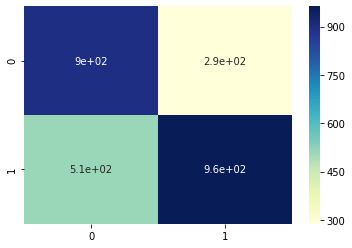

Accuracy: 0.6996996996996997


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[901, 288],
        [512, 963]]))

In [114]:
grid_search(X_rus1,features,target,random_grid,"rf",5)

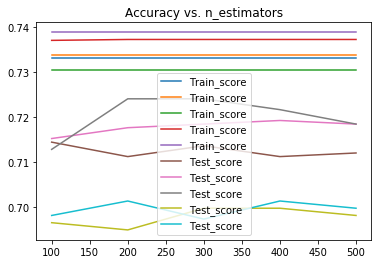

In [262]:
params_test(X_rus1,features,target,"n_estimators",[100,200,300,400,500],"rf",5)

In [263]:
n_estimators = [200,250,300,350,400]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


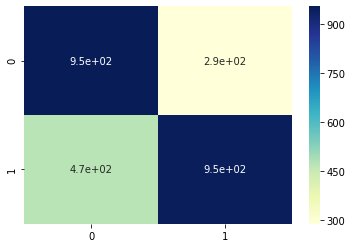

Accuracy: 0.7143393393393394


({'n_estimators': 350,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[953, 289],
        [472, 950]]))

In [264]:
grid_search(X_rus1,features,target,random_grid,"rf",5)

### (iii) Personality + Orientation + Gender

In [275]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation','gender']

target = 'stress_category'

#### Under 20

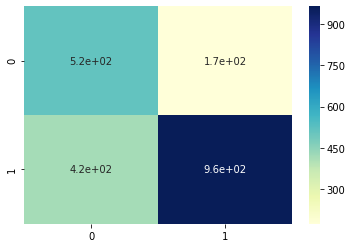

Accuracy: 0.7140790742526519


((                        Coefficient
  Extroversion              -0.137545
  Agreeableness             -0.360511
  Conscientiousness         -0.191438
  Emotional_stability       -1.755481
  Openness_to_experience    -0.179488
  orientation                0.146653
  gender                     0.425609,), array([[516, 173],
        [420, 965]]))

In [117]:
train_model(X_rus0,"log_reg",features,target)

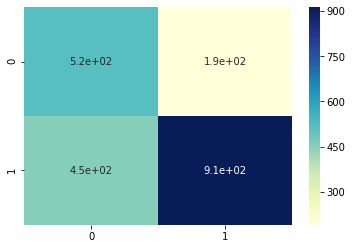

Accuracy: 0.6894889103182257


((                        Coefficient
  Extroversion               0.083601
  Agreeableness              0.097788
  Conscientiousness          0.085907
  Emotional_stability        0.546146
  Openness_to_experience     0.094665
  orientation                0.042850
  gender                     0.049043,), array([[519, 191],
        [453, 911]]))

In [118]:
train_model(X_rus0,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


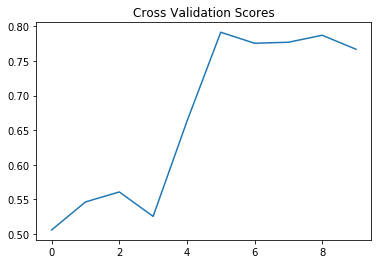

[0.5057803468208093,
 0.546242774566474,
 0.5606936416184971,
 0.5253256150506512,
 0.662807525325615,
 0.7916063675832128,
 0.7756874095513748,
 0.7771345875542692,
 0.7872648335745297,
 0.7670043415340086]

In [119]:
kfold_cv(X_rus0,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.2min finished


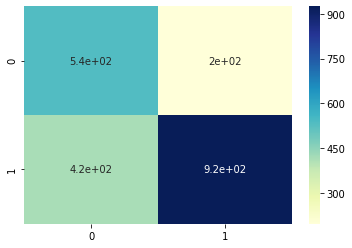

Accuracy: 0.7049180327868853


({'n_estimators': 500,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[537, 196],
        [416, 925]]))

In [120]:
grid_search(X_rus0,features,target,random_grid,"rf",5)

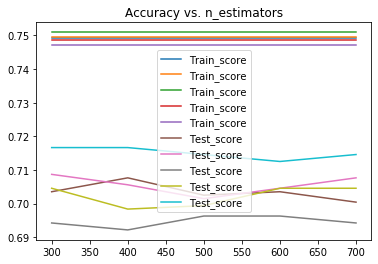

In [266]:
params_test(X_rus0,features,target,"n_estimators",[300,400,500,600,700],"rf",5)

In [267]:
n_estimators = [300,350,400,450,500,700]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


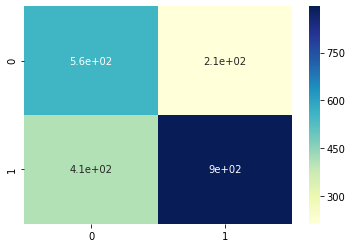

Accuracy: 0.6996142719382835


({'n_estimators': 700,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[556, 213],
        [410, 895]]))

In [268]:
grid_search(X_rus0,features,target,random_grid,"rf",5)

#### Above 20

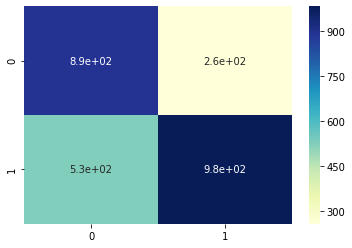

Accuracy: 0.704954954954955


((                        Coefficient
  Extroversion              -0.232799
  Agreeableness             -0.227542
  Conscientiousness         -0.063505
  Emotional_stability       -1.781133
  Openness_to_experience    -0.213938
  orientation                0.248577
  gender                     0.317439,), array([[894, 257],
        [529, 984]]))

In [122]:
train_model(X_rus1,"log_reg",features,target)

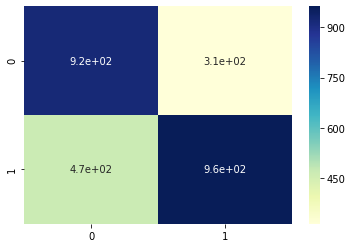

Accuracy: 0.7072072072072072


((                        Coefficient
  Extroversion               0.077951
  Agreeableness              0.085857
  Conscientiousness          0.094044
  Emotional_stability        0.568982
  Openness_to_experience     0.094653
  orientation                0.035919
  gender                     0.042595,), array([[921, 313],
        [467, 963]]))

In [123]:
train_model(X_rus1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


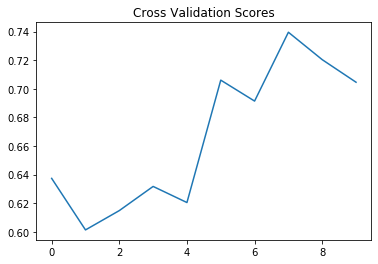

[0.6373873873873874,
 0.6013513513513513,
 0.6148648648648649,
 0.6317567567567568,
 0.6204954954954955,
 0.706081081081081,
 0.6914414414414415,
 0.7395715896279594,
 0.7204058624577226,
 0.7046223224351748]

In [124]:
kfold_cv(X_rus1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  3.7min finished


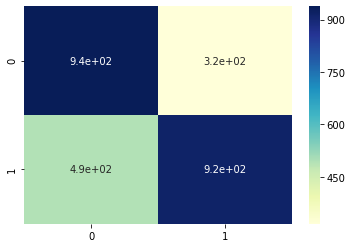

Accuracy: 0.6963213213213213


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_depth': 10},
 array([[938, 315],
        [494, 917]]))

In [125]:
grid_search(X_rus1,features,target,random_grid,"rf",7)

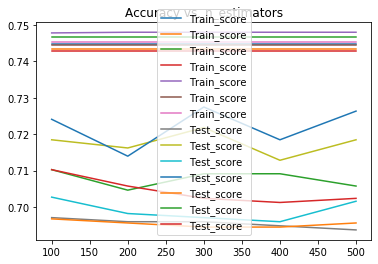

In [276]:
params_test(X_rus1,features,target,"n_estimators",[100,200,300,400,500],"rf",7)

In [277]:
n_estimators = [100,300,500]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid2 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid2)

{'n_estimators': [100, 300, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  3.3min finished


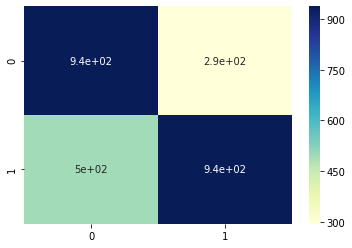

Accuracy: 0.7034534534534534


({'n_estimators': 500,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[936, 294],
        [496, 938]]))

In [278]:
grid_search(X_rus1,features,target,random_grid2,"rf",7)

### (iv) Personality + Orientation + Age + Gender + FamilySize

In [129]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation','gender','familysize']

target = 'stress_category'

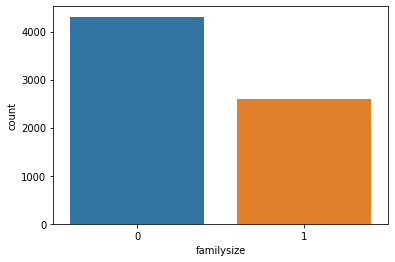

In [130]:
sns.countplot(X_rus0['familysize'])

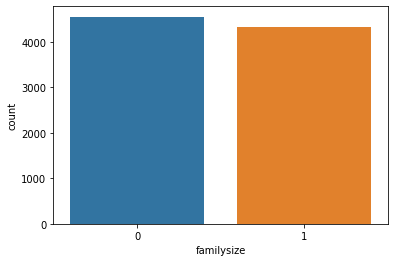

In [131]:
sns.countplot(X_rus1['familysize'])

#### Under 20

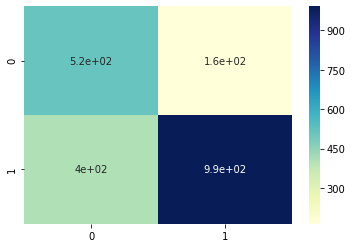

Accuracy: 0.7261330761812922


((                        Coefficient
  Extroversion              -0.213171
  Agreeableness             -0.345422
  Conscientiousness         -0.174886
  Emotional_stability       -1.690606
  Openness_to_experience    -0.164797
  orientation                0.157813
  gender                     0.442901
  familysize                -0.000220,), array([[515, 164],
        [404, 991]]))

In [132]:
train_model(X_rus0,"log_reg",features,target)

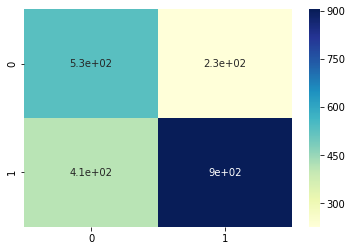

Accuracy: 0.6918997107039537


((                        Coefficient
  Extroversion               0.094695
  Agreeableness              0.106927
  Conscientiousness          0.098886
  Emotional_stability        0.448332
  Openness_to_experience     0.095219
  orientation                0.050890
  gender                     0.048942
  familysize                 0.056110,), array([[531, 226],
        [413, 904]]))

In [133]:
train_model(X_rus0,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


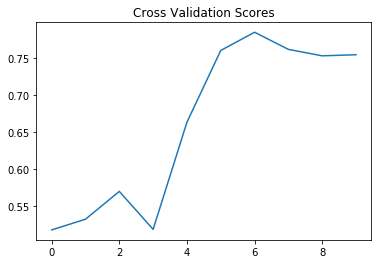

[0.5173410404624278,
 0.5317919075144508,
 0.569364161849711,
 0.5180897250361794,
 0.662807525325615,
 0.7597684515195369,
 0.784370477568741,
 0.7612156295224313,
 0.7525325615050651,
 0.7539797395079595]

In [134]:
kfold_cv(X_rus0,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished


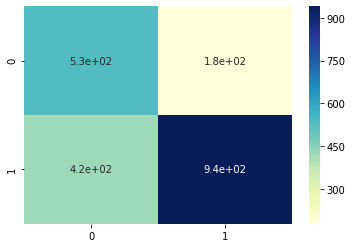

Accuracy: 0.710221793635487


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[533, 178],
        [423, 940]]))

In [135]:
grid_search(X_rus0,features,target,random_grid,"rf",5)

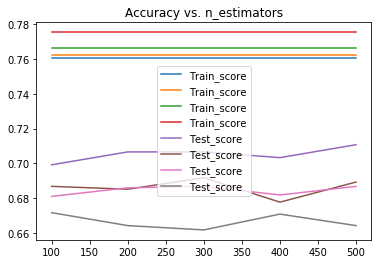

In [136]:
params_test(X_rus0,features,target,"n_estimators",[100,200,300,400,500],"rf",4)

In [137]:
n_estimators = [200,250,300,350,400,450]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid3 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid3)

{'n_estimators': [200, 250, 300, 350, 400, 450], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.8min finished


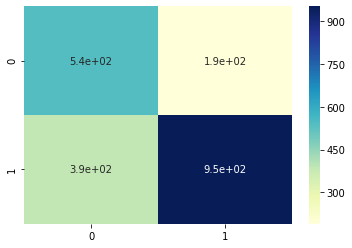

Accuracy: 0.7213114754098361


({'n_estimators': 400,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[544, 190],
        [388, 952]]))

In [138]:
grid_search(X_rus0,features,target,random_grid3,"rf",4)

#### Above 20

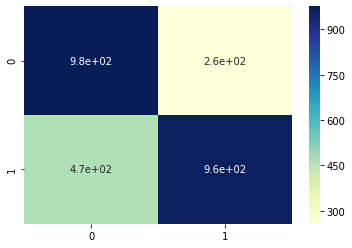

Accuracy: 0.7282282282282282


((                        Coefficient
  Extroversion              -0.213915
  Agreeableness             -0.175365
  Conscientiousness         -0.153901
  Emotional_stability       -1.698496
  Openness_to_experience    -0.192257
  orientation                0.188118
  gender                     0.302579
  familysize                 0.054875,), array([[976, 257],
        [467, 964]]))

In [139]:
train_model(X_rus1,"log_reg",features,target)

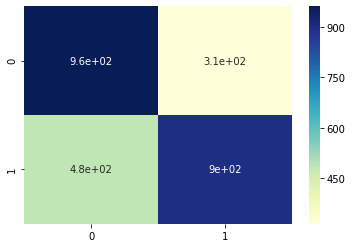

Accuracy: 0.700075075075075


((                        Coefficient
  Extroversion               0.079670
  Agreeableness              0.100020
  Conscientiousness          0.101283
  Emotional_stability        0.493071
  Openness_to_experience     0.093751
  orientation                0.039405
  gender                     0.046202
  familysize                 0.046598,), array([[962, 314],
        [485, 903]]))

In [140]:
train_model(X_rus1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


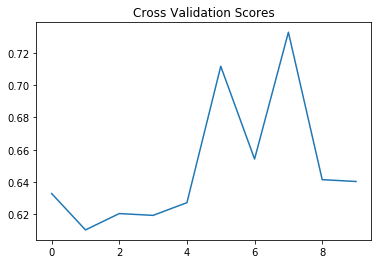

[0.6328828828828829,
 0.6103603603603603,
 0.6204954954954955,
 0.6193693693693694,
 0.6272522522522522,
 0.7117117117117117,
 0.6542792792792793,
 0.7328072153325818,
 0.6414881623449831,
 0.6403607666290868]

In [141]:
kfold_cv(X_rus1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  4.1min finished


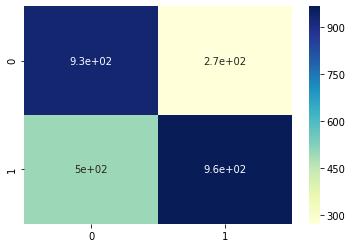

Accuracy: 0.7117117117117117


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[931, 271],
        [497, 965]]))

In [142]:
grid_search(X_rus1,features,target,random_grid,"rf",7)

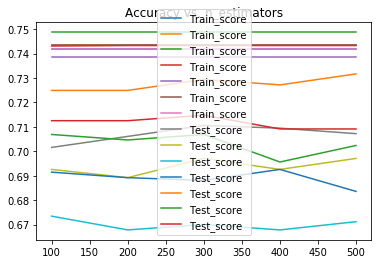

In [279]:
params_test(X_rus1,features,target,"n_estimators",[100,200,300,400,500],"rf",7)

In [144]:
n_estimators = [450,500,550,600,650,700]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid4 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid4)

{'n_estimators': [450, 500, 550, 600, 650, 700], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  5.9min finished


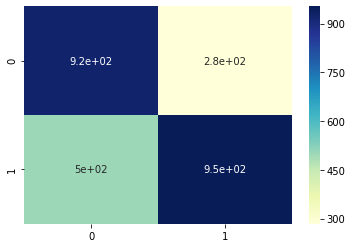

Accuracy: 0.704954954954955


({'n_estimators': 500,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[925, 284],
        [502, 953]]))

In [145]:
grid_search(X_rus1,features,target,random_grid4,"rf",7)

## Divide into 3 age groups.

First divide this sample according to age groups, then undersample each subsample according to `stress_category`

In [146]:
X_new = data.copy()

In [147]:
X_new.loc[X_new['age']<=20, 'age'] = 0
X_new.loc[(X_new['age']>=21)&(X_new['age']<=30), 'age'] = 1
X_new.loc[X_new['age']>30, 'age'] = 2

In [148]:
X_new1 = X_new[X_new['age']==0]

In [149]:
X_new2 = X_new[X_new['age']==1]

In [150]:
X_new3 = X_new[X_new['age']==2]

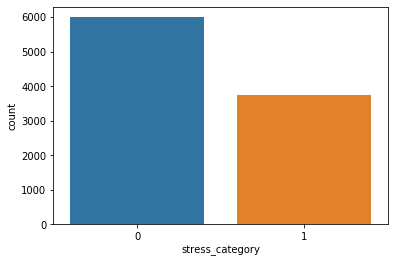

In [281]:
sns.countplot(X_new1['stress_category'])

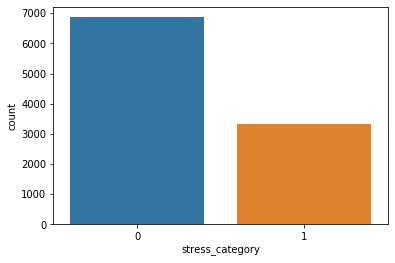

In [282]:
sns.countplot(X_new2['stress_category'])

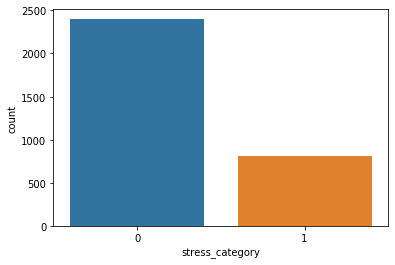

In [283]:
sns.countplot(X_new3['stress_category'])

### (i) Personality

#### Under 20

In [151]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience']

target = 'stress_category'

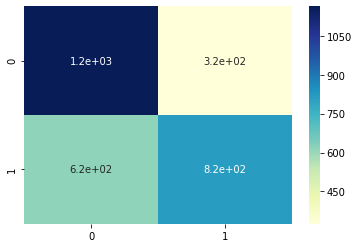

Accuracy: 0.6773752563226247


((                        Coefficient
  Extroversion              -0.154782
  Agreeableness             -0.295038
  Conscientiousness         -0.124502
  Emotional_stability       -1.771010
  Openness_to_experience    -0.148130,), array([[1164,  325],
        [ 619,  818]]))

In [152]:
train_model(X_new1,"log_reg",features,target)

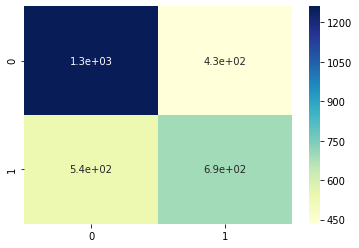

Accuracy: 0.6678058783321941


((                        Coefficient
  Extroversion               0.056482
  Agreeableness              0.070628
  Conscientiousness          0.073488
  Emotional_stability        0.730124
  Openness_to_experience     0.069279,), array([[1261,  434],
        [ 538,  693]]))

In [153]:
train_model(X_new1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


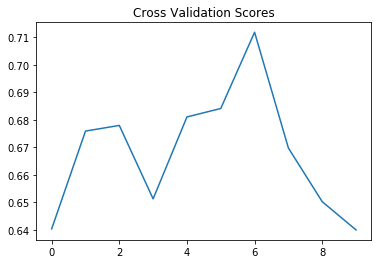

[0.6403688524590164,
 0.6758974358974359,
 0.6779487179487179,
 0.6512820512820513,
 0.681025641025641,
 0.6841025641025641,
 0.7117948717948718,
 0.6697435897435897,
 0.6502564102564102,
 0.64]

In [154]:
kfold_cv(X_new1,features,target,"rf")

In [155]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 6 folds for each of 72 candidates, totalling 432 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.9min finished


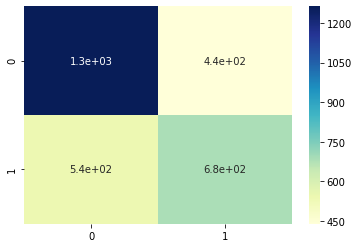

Accuracy: 0.6657552973342447


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': 10},
 array([[1263,  439],
        [ 539,  685]]))

In [156]:
grid_search(X_new1,features,target,random_grid,"rf",6)

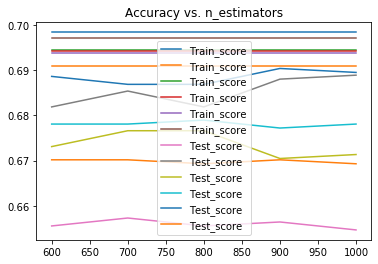

In [157]:
params_test(X_new1,features,target,"n_estimators",[100,200,300,400,500],"rf",6)

In [158]:
n_estimators = [700,750,800,850,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid5 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid5)

{'n_estimators': [700, 750, 800, 850, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.1min finished


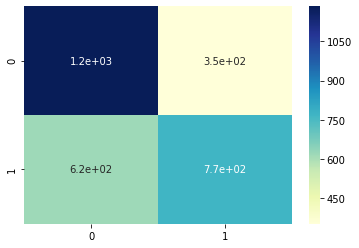

Accuracy: 0.6678058783321941


({'n_estimators': 850,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 100},
 array([[1184,  352],
        [ 620,  770]]))

In [159]:
grid_search(X_new1,features,target,random_grid5,"rf",6)

#### Between 20 and 30.

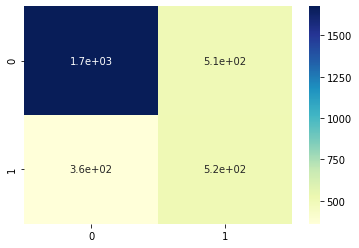

Accuracy: 0.7164813603662524


((                        Coefficient
  Extroversion              -0.201758
  Agreeableness             -0.241636
  Conscientiousness         -0.126907
  Emotional_stability       -1.711667
  Openness_to_experience    -0.205694,), array([[1676,  506],
        [ 361,  515]]))

In [160]:
train_model(X_new2,"log_reg",features,target)

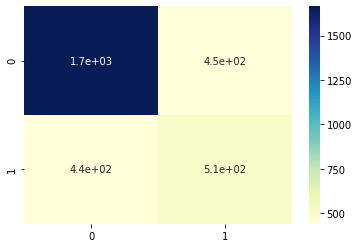

Accuracy: 0.709941137998692


((                        Coefficient
  Extroversion               0.062052
  Agreeableness              0.057934
  Conscientiousness          0.091325
  Emotional_stability        0.720387
  Openness_to_experience     0.068301,), array([[1665,  447],
        [ 440,  506]]))

In [161]:
train_model(X_new2,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


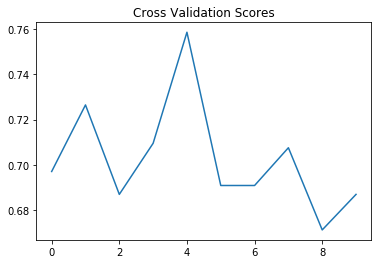

[0.6970588235294117,
 0.7264705882352941,
 0.6869479882237488,
 0.7095191364082434,
 0.7585868498527969,
 0.6908734052993131,
 0.6908734052993131,
 0.7075564278704612,
 0.6712463199214916,
 0.6869479882237488]

In [162]:
kfold_cv(X_new2,features,target,"rf")

In [163]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 72 candidates, totalling 288 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.1min finished


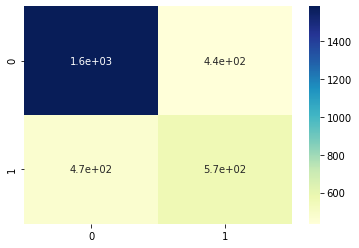

Accuracy: 0.7030739045127534


({'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[1581,  436],
        [ 472,  569]]))

In [164]:
grid_search(X_new2,features,target,random_grid,"rf",4)

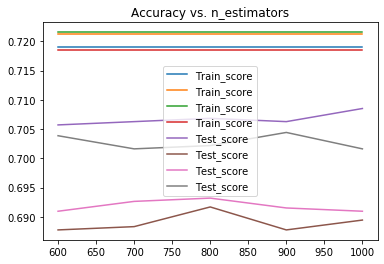

In [165]:
params_test(X_new2,features,target,"n_estimators",[600,700,800,900,1000],"rf",4)

In [166]:
n_estimators = [600,650,700,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid6 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid6)

{'n_estimators': [600, 650, 700, 900, 950, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished


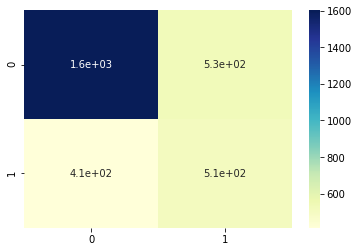

Accuracy: 0.6909744931327665


({'n_estimators': 1000,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': None},
 array([[1602,  532],
        [ 413,  511]]))

In [167]:
grid_search(X_new2,features,target,random_grid6,"rf",4)

#### Above 30

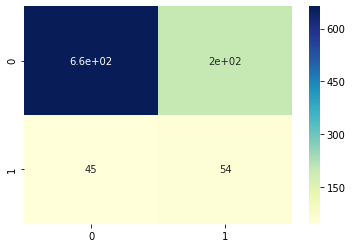

Accuracy: 0.7445482866043613


((                        Coefficient
  Extroversion              -0.061461
  Agreeableness             -0.221667
  Conscientiousness         -0.052095
  Emotional_stability       -1.644985
  Openness_to_experience    -0.315668,), array([[663, 201],
        [ 45,  54]]))

In [168]:
train_model(X_new3,"log_reg",features,target)

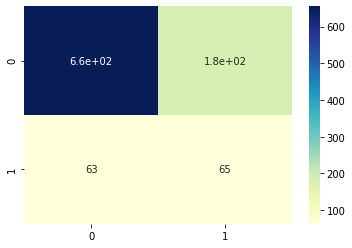

Accuracy: 0.7476635514018691


((                        Coefficient
  Extroversion               0.102313
  Agreeableness              0.123373
  Conscientiousness          0.109935
  Emotional_stability        0.533950
  Openness_to_experience     0.130428,), array([[655, 180],
        [ 63,  65]]))

In [169]:
train_model(X_new3,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


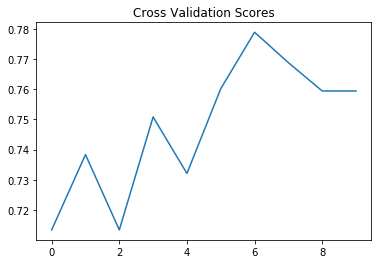

[0.7133956386292835,
 0.7383177570093458,
 0.7133956386292835,
 0.7507788161993769,
 0.7320872274143302,
 0.7601246105919003,
 0.778816199376947,
 0.76875,
 0.759375,
 0.759375]

In [170]:
kfold_cv(X_new3,features,target,"rf")

In [171]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 7 folds for each of 72 candidates, totalling 504 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  2.1min finished


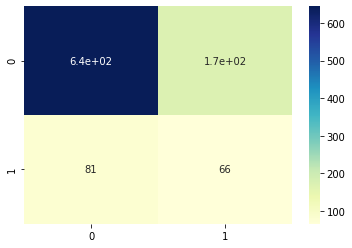

Accuracy: 0.7372793354101765


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 100},
 array([[644, 172],
        [ 81,  66]]))

In [172]:
grid_search(X_new3,features,target,random_grid,"rf",7)

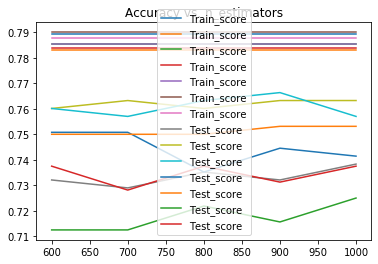

In [173]:
params_test(X_new3,features,target,"n_estimators",[600,700,800,900,1000],"rf",7)

In [174]:
n_estimators = [600,650,700,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid7 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid7)

{'n_estimators': [600, 650, 700, 900, 950, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  4.3min finished


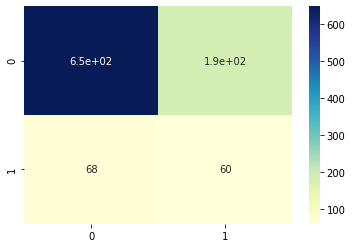

Accuracy: 0.7362409138110073


({'n_estimators': 600,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[649, 186],
        [ 68,  60]]))

In [175]:
grid_search(X_new3,features,target,random_grid7,"rf",7)

### (ii) Personality + Orientation

In [176]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation']

target = 'stress_category'

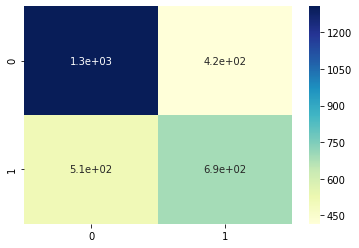

Accuracy: 0.683526999316473


((                        Coefficient
  Extroversion              -0.126797
  Agreeableness             -0.305290
  Conscientiousness         -0.139443
  Emotional_stability       -1.725872
  Openness_to_experience    -0.184965
  orientation                0.243920,), array([[1307,  415],
        [ 511,  693]]))

In [177]:
train_model(X_new1,"log_reg",features,target)

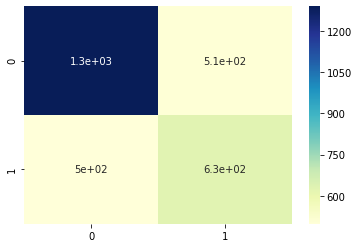

Accuracy: 0.6565276828434723


((                        Coefficient
  Extroversion               0.067429
  Agreeableness              0.082637
  Conscientiousness          0.090479
  Emotional_stability        0.643186
  Openness_to_experience     0.078353
  orientation                0.037916,), array([[1290,  507],
        [ 498,  631]]))

In [178]:
train_model(X_new1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


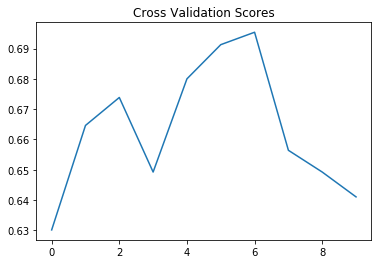

[0.6301229508196722,
 0.6646153846153846,
 0.6738461538461539,
 0.6492307692307693,
 0.68,
 0.6912820512820513,
 0.6953846153846154,
 0.6564102564102564,
 0.6492307692307693,
 0.6410256410256411]

In [179]:
kfold_cv(X_new1,features,target,"rf")

In [180]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 6 folds for each of 72 candidates, totalling 432 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  3.1min finished


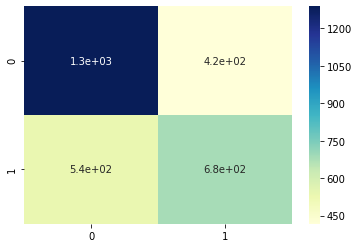

Accuracy: 0.6742993848257006


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 100},
 array([[1288,  417],
        [ 536,  685]]))

In [181]:
grid_search(X_new1,features,target,random_grid,"rf",6)

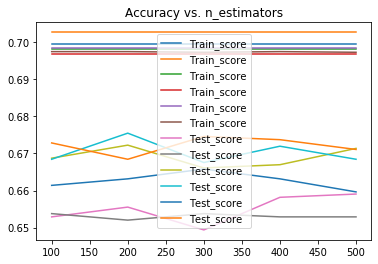

In [182]:
params_test(X_new1,features,target,"n_estimators",[100,200,300,400,500],"rf",6)

In [183]:
n_estimators = [200,250,300,350,400]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid8 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid8)

{'n_estimators': [200, 250, 300, 350, 400], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.5min finished


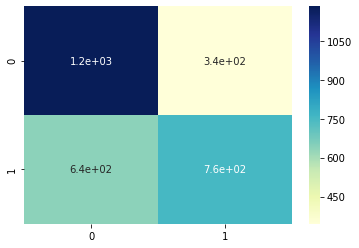

Accuracy: 0.6626794258373205


({'n_estimators': 350,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[1183,  345],
        [ 642,  756]]))

In [184]:
grid_search(X_new1,features,target,random_grid8,"rf",4)

### Between 20 and 30

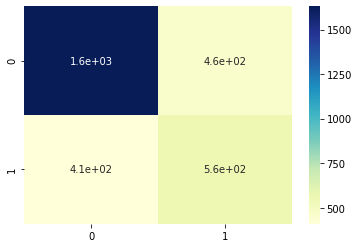

Accuracy: 0.7148463047743623


((                        Coefficient
  Extroversion              -0.167939
  Agreeableness             -0.217082
  Conscientiousness         -0.146761
  Emotional_stability       -1.729068
  Openness_to_experience    -0.198037
  orientation                0.134661,), array([[1630,  462],
        [ 410,  556]]))

In [185]:
train_model(X_new2,"log_reg",features,target)

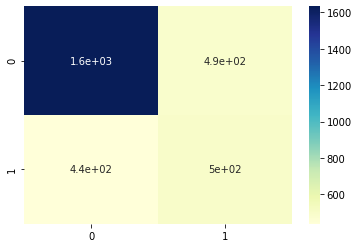

Accuracy: 0.6975147155003271


((                        Coefficient
  Extroversion               0.065019
  Agreeableness              0.076992
  Conscientiousness          0.091608
  Emotional_stability        0.645442
  Openness_to_experience     0.090428
  orientation                0.030511,), array([[1633,  487],
        [ 438,  500]]))

In [186]:
train_model(X_new2,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


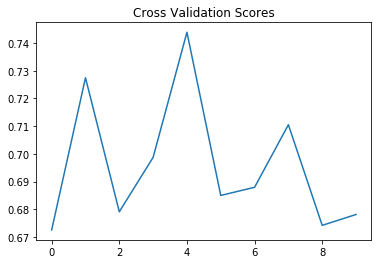

[0.6725490196078432,
 0.7274509803921568,
 0.6790971540726202,
 0.6987242394504416,
 0.7438665358194309,
 0.6849852796859667,
 0.6879293424926398,
 0.7105004906771345,
 0.6741903827281649,
 0.6781157998037292]

In [187]:
kfold_cv(X_new2,features,target,"rf")

In [188]:
n_estimators = [100,500,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 72 candidates, totalling 288 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.0min finished


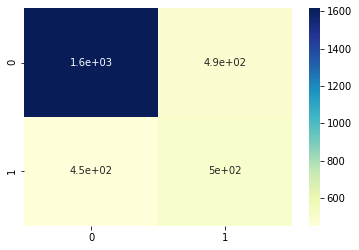

Accuracy: 0.6926095487246566


({'n_estimators': 500,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[1615,  487],
        [ 453,  503]]))

In [189]:
grid_search(X_new2,features,target,random_grid,"rf",4)

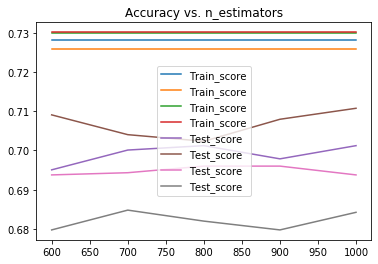

In [190]:
params_test(X_new2,features,target,"n_estimators",[600,700,800,900,1000],"rf",4)

In [191]:
n_estimators = [700,750,800,850,900]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid9 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid9)

{'n_estimators': [700, 750, 800, 850, 900], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.2min finished


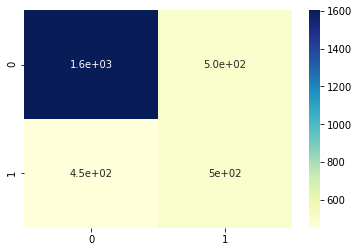

Accuracy: 0.6870503597122302


({'n_estimators': 900,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[1603,  505],
        [ 452,  498]]))

In [192]:
grid_search(X_new2,features,target,random_grid9,"rf",4)

#### Above 30

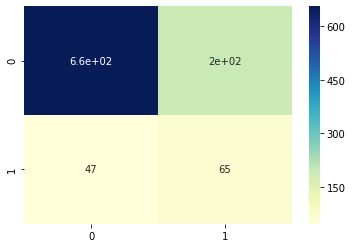

Accuracy: 0.7487019730010385


((                        Coefficient
  Extroversion              -0.117823
  Agreeableness             -0.283790
  Conscientiousness         -0.067972
  Emotional_stability       -1.625394
  Openness_to_experience    -0.232940
  orientation                0.337902,), array([[656, 195],
        [ 47,  65]]))

In [193]:
train_model(X_new3,"log_reg",features,target)

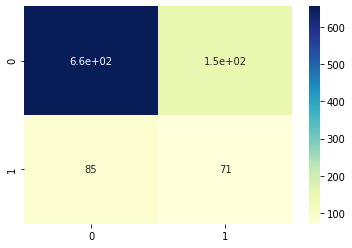

Accuracy: 0.7538940809968847


((                        Coefficient
  Extroversion               0.110239
  Agreeableness              0.118023
  Conscientiousness          0.109619
  Emotional_stability        0.466762
  Openness_to_experience     0.136456
  orientation                0.058900,), array([[655, 152],
        [ 85,  71]]))

In [194]:
train_model(X_new3,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


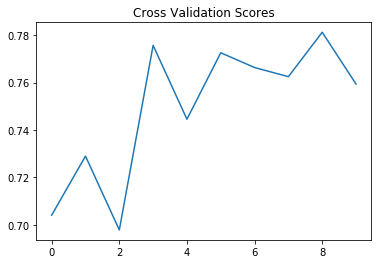

[0.7040498442367601,
 0.7289719626168224,
 0.6978193146417445,
 0.7757009345794392,
 0.7445482866043613,
 0.7725856697819314,
 0.7663551401869159,
 0.7625,
 0.78125,
 0.759375]

In [195]:
kfold_cv(X_new3,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   52.1s finished


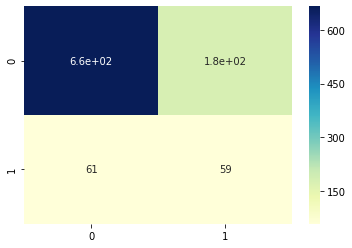

Accuracy: 0.7518172377985463


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[665, 178],
        [ 61,  59]]))

In [196]:
grid_search(X_new3,features,target,random_grid,"rf",3)

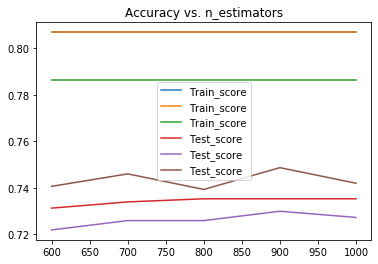

In [197]:
params_test(X_new3,features,target,"n_estimators",[600,700,800,900,1000],"rf",3)

In [198]:
n_estimators = [600,650,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid10 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


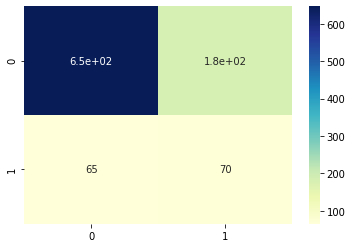

Accuracy: 0.7445482866043613


({'n_estimators': 600,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_depth': None},
 array([[647, 181],
        [ 65,  70]]))

In [199]:
grid_search(X_new3,features,target,random_grid10,"rf",3)

### (iii) Personality + Orientation + Gender

In [200]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation','gender']

target = 'stress_category'

#### Under 20

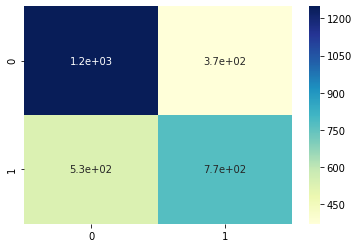

Accuracy: 0.6910457963089542


((                        Coefficient
  Extroversion              -0.177234
  Agreeableness             -0.344699
  Conscientiousness         -0.158958
  Emotional_stability       -1.670171
  Openness_to_experience    -0.117090
  orientation                0.185386
  gender                     0.507413,), array([[1249,  370],
        [ 534,  773]]))

In [201]:
train_model(X_new1,"log_reg",features,target)

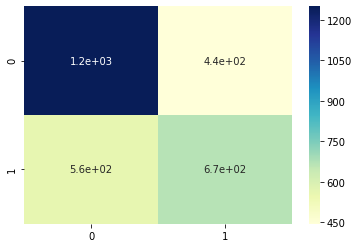

Accuracy: 0.6561859193438141


((                        Coefficient
  Extroversion               0.083111
  Agreeableness              0.094647
  Conscientiousness          0.086819
  Emotional_stability        0.538820
  Openness_to_experience     0.095029
  orientation                0.045050
  gender                     0.056524,), array([[1250,  444],
        [ 562,  670]]))

In [202]:
train_model(X_new1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


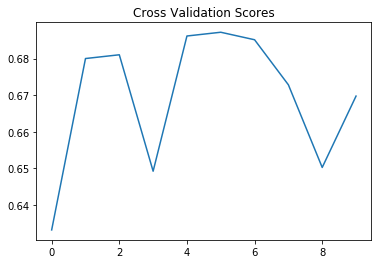

[0.6331967213114754,
 0.68,
 0.681025641025641,
 0.6492307692307693,
 0.6861538461538461,
 0.6871794871794872,
 0.6851282051282052,
 0.6728205128205128,
 0.6502564102564102,
 0.6697435897435897]

In [203]:
kfold_cv(X_new1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.6min finished


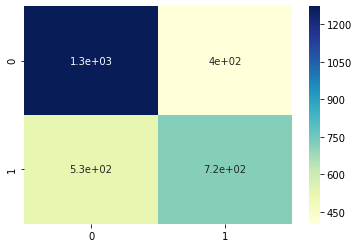

Accuracy: 0.6807928913192071


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1271,  403],
        [ 531,  721]]))

In [204]:
grid_search(X_new1,features,target,random_grid,"rf",5)

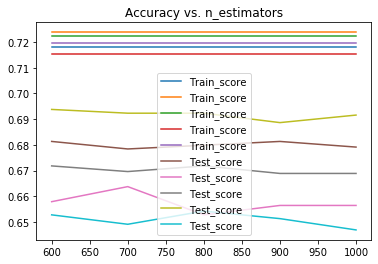

In [205]:
params_test(X_new1,features,target,"n_estimators",[600,700,800,900,1000],"rf",5)

In [206]:
n_estimators = [600,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid11 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.7min finished


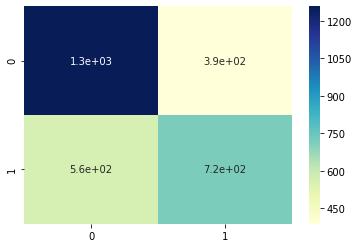

Accuracy: 0.6760082023239918


({'n_estimators': 900,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1259,  387],
        [ 561,  719]]))

In [207]:
grid_search(X_new1,features,target,random_grid11,"rf",5)

#### Between 20 and 30

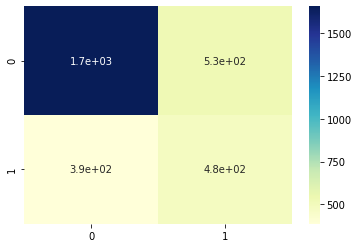

Accuracy: 0.6991497710922171


((                        Coefficient
  Extroversion              -0.231990
  Agreeableness             -0.322083
  Conscientiousness         -0.152889
  Emotional_stability       -1.737889
  Openness_to_experience    -0.196905
  orientation                0.132674
  gender                     0.370656,), array([[1655,  533],
        [ 387,  483]]))

In [208]:
train_model(X_new2,"log_reg",features,target)

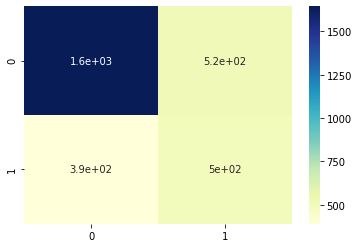

Accuracy: 0.7024198822759974


((                        Coefficient
  Extroversion               0.088395
  Agreeableness              0.088974
  Conscientiousness          0.099541
  Emotional_stability        0.547571
  Openness_to_experience     0.090881
  orientation                0.043425
  gender                     0.041213,), array([[1645,  520],
        [ 390,  503]]))

In [209]:
train_model(X_new2,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


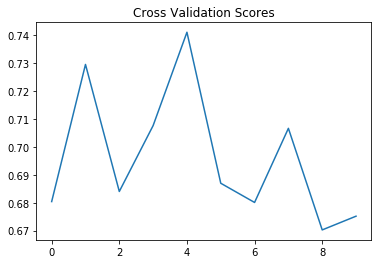

[0.6803921568627451,
 0.7294117647058823,
 0.6840039254170756,
 0.7075564278704612,
 0.7409224730127576,
 0.6869479882237488,
 0.6800785083415113,
 0.7065750736015701,
 0.6702649656526006,
 0.6751717369970559]

In [210]:
kfold_cv(X_new2,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.1min finished


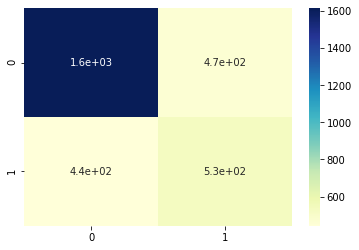

Accuracy: 0.7014388489208633


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[1613,  470],
        [ 443,  532]]))

In [211]:
grid_search(X_new2,features,target,random_grid,"rf",4)

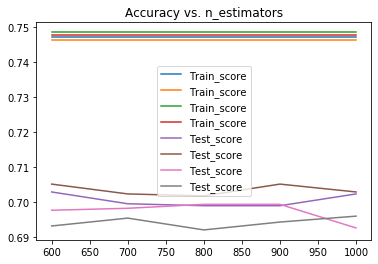

In [212]:
params_test(X_new2,features,target,"n_estimators",[600,700,800,900,1000],"rf",4)

In [213]:
n_estimators = [600,900,950,1000]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid12 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  4.6min finished


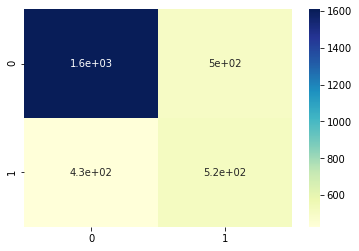

Accuracy: 0.6958796599084369


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1608,  502],
        [ 428,  520]]))

In [214]:
grid_search(X_new2,features,target,random_grid12,"rf",4)

#### Above 30

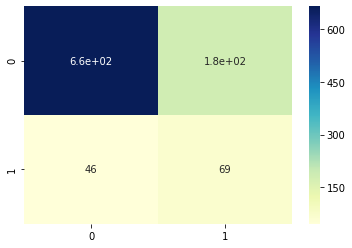

Accuracy: 0.7622014537902388


((                        Coefficient
  Extroversion              -0.123900
  Agreeableness             -0.263200
  Conscientiousness          0.033679
  Emotional_stability       -1.507418
  Openness_to_experience    -0.308185
  orientation                0.352142
  gender                     0.214485,), array([[665, 183],
        [ 46,  69]]))

In [215]:
train_model(X_new3,"log_reg",features,target)

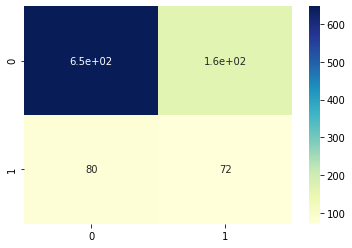

Accuracy: 0.7455867082035307


((                        Coefficient
  Extroversion               0.121784
  Agreeableness              0.124392
  Conscientiousness          0.122423
  Emotional_stability        0.373612
  Openness_to_experience     0.136350
  orientation                0.055510
  gender                     0.065929,), array([[646, 165],
        [ 80,  72]]))

In [216]:
train_model(X_new3,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


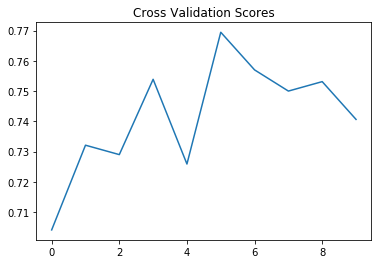

[0.7040498442367601,
 0.7320872274143302,
 0.7289719626168224,
 0.7538940809968847,
 0.7258566978193146,
 0.7694704049844237,
 0.7570093457943925,
 0.75,
 0.753125,
 0.740625]

In [217]:
kfold_cv(X_new3,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.8min finished


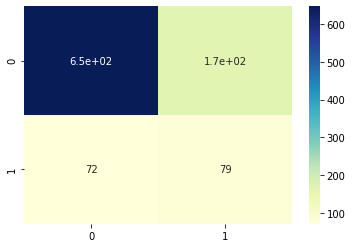

Accuracy: 0.7528556593977155


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[646, 166],
        [ 72,  79]]))

In [218]:
grid_search(X_new3,features,target,random_grid,"rf",6)

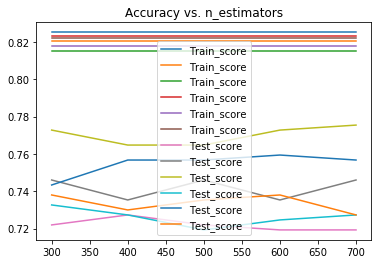

In [219]:
params_test(X_new3,features,target,"n_estimators",[300,400,500,600,700],"rf",6)

In [220]:
n_estimators = [500,550,600,650,700]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid13 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.9min finished


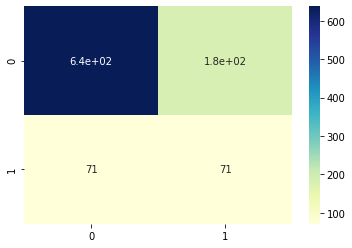

Accuracy: 0.7362409138110073


({'n_estimators': 600,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None},
 array([[638, 183],
        [ 71,  71]]))

In [221]:
grid_search(X_new3,features,target,random_grid13,"rf",6)

### (iv) Personality + Orientation + Gender + Familysize

In [222]:
features = ['Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience','orientation','gender','familysize']

target = 'stress_category'

#### Under 20

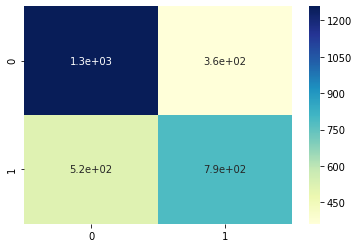

Accuracy: 0.6989063568010937


((                        Coefficient
  Extroversion              -0.116951
  Agreeableness             -0.306906
  Conscientiousness         -0.149492
  Emotional_stability       -1.682603
  Openness_to_experience    -0.170180
  orientation                0.193457
  gender                     0.473103
  familysize                 0.030564,), array([[1258,  362],
        [ 519,  787]]))

In [223]:
train_model(X_new1,"log_reg",features,target)

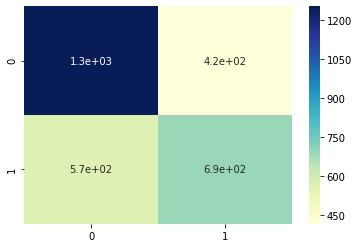

Accuracy: 0.6640464798359536


((                        Coefficient
  Extroversion               0.086525
  Agreeableness              0.094989
  Conscientiousness          0.094861
  Emotional_stability        0.469629
  Openness_to_experience     0.099479
  orientation                0.046426
  gender                     0.052045
  familysize                 0.056047,), array([[1252,  417],
        [ 566,  691]]))

In [224]:
train_model(X_new1,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


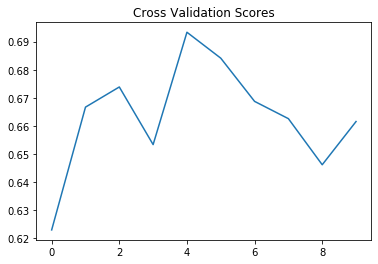

[0.6229508196721312,
 0.6666666666666666,
 0.6738461538461539,
 0.6533333333333333,
 0.6933333333333334,
 0.6841025641025641,
 0.6687179487179488,
 0.6625641025641026,
 0.6461538461538462,
 0.6615384615384615]

In [225]:
kfold_cv(X_new1,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.2min finished


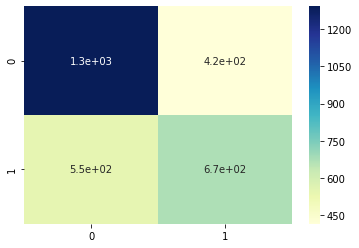

Accuracy: 0.6715652768284347


({'n_estimators': 1000,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1292,  415],
        [ 546,  673]]))

In [226]:
grid_search(X_new1,features,target,random_grid,"rf",4)

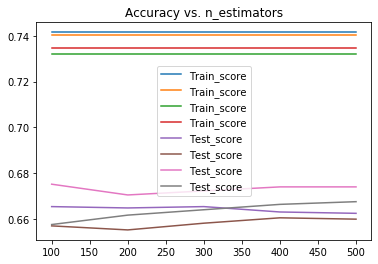

In [227]:
params_test(X_new1,features,target,"n_estimators",[100,200,300,400,500],"rf",4)

In [228]:
n_estimators = [100,250,300,350,400]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid14 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished


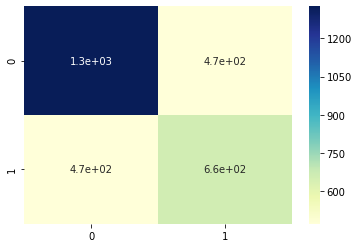

Accuracy: 0.6773752563226247


({'n_estimators': 350,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1326,  473],
        [ 471,  656]]))

In [229]:
grid_search(X_new1,features,target,random_grid14,"rf",4)

#### Between 20 and 30

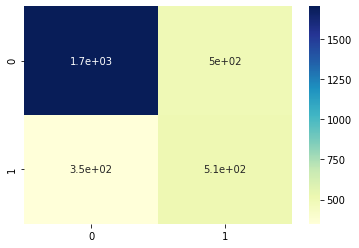

Accuracy: 0.7226945716154349


((                        Coefficient
  Extroversion              -0.238646
  Agreeableness             -0.220998
  Conscientiousness         -0.123910
  Emotional_stability       -1.747893
  Openness_to_experience    -0.153777
  orientation                0.107493
  gender                     0.293089
  familysize                 0.045860,), array([[1702,  499],
        [ 349,  508]]))

In [230]:
train_model(X_new2,"log_reg",features,target)

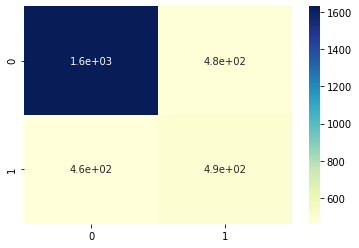

Accuracy: 0.6932635709614127


((                        Coefficient
  Extroversion               0.085178
  Agreeableness              0.096494
  Conscientiousness          0.105586
  Emotional_stability        0.466471
  Openness_to_experience     0.103680
  orientation                0.044301
  gender                     0.046919
  familysize                 0.051370,), array([[1630,  477],
        [ 461,  490]]))

In [231]:
train_model(X_new2,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


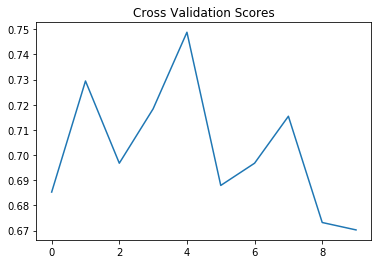

[0.6852941176470588,
 0.7294117647058823,
 0.6967615309126595,
 0.718351324828263,
 0.7487733071638861,
 0.6879293424926398,
 0.6967615309126595,
 0.7154072620215898,
 0.6732090284592738,
 0.6702649656526006]

In [232]:
kfold_cv(X_new2,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.3min finished


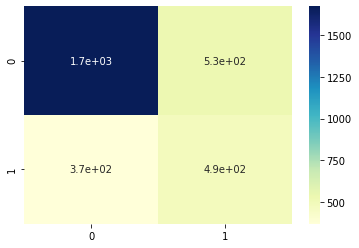

Accuracy: 0.7053629823413996


({'n_estimators': 500,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 50},
 array([[1670,  530],
        [ 371,  487]]))

In [233]:
grid_search(X_new2,features,target,random_grid,"rf",4)

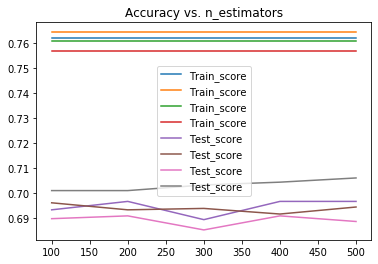

In [234]:
params_test(X_new2,features,target,"n_estimators",[100,200,300,400,500],"rf",4)

In [235]:
n_estimators = [300,350,400,450]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid15 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  2.1min finished


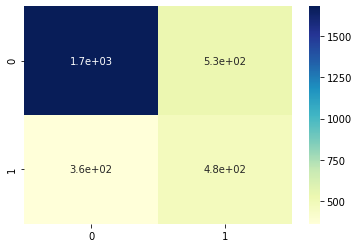

Accuracy: 0.7063440156965337


({'n_estimators': 450,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_depth': 10},
 array([[1678,  534],
        [ 364,  482]]))

In [236]:
grid_search(X_new2,features,target,random_grid15,"rf",4)

#### Above 30

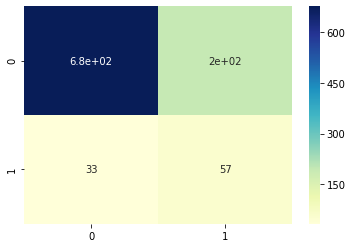

Accuracy: 0.7622014537902388


((                        Coefficient
  Extroversion              -0.169925
  Agreeableness             -0.231646
  Conscientiousness          0.039113
  Emotional_stability       -1.519426
  Openness_to_experience    -0.247670
  orientation                0.359921
  gender                     0.027116
  familysize                -0.113467,), array([[677, 196],
        [ 33,  57]]))

In [237]:
train_model(X_new3,"log_reg",features,target)

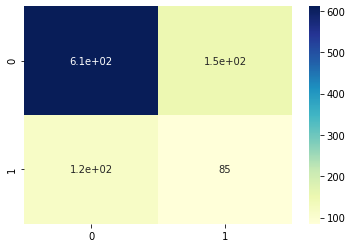

Accuracy: 0.7227414330218068


((                        Coefficient
  Extroversion               0.101415
  Agreeableness              0.124401
  Conscientiousness          0.128353
  Emotional_stability        0.333506
  Openness_to_experience     0.127672
  orientation                0.055838
  gender                     0.063654
  familysize                 0.065161,), array([[611, 150],
        [117,  85]]))

In [238]:
train_model(X_new3,"rf",features,target)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


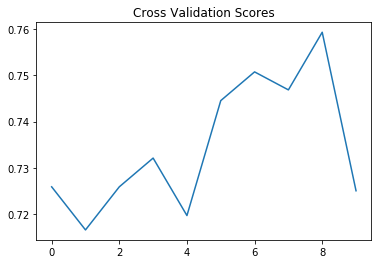

[0.7258566978193146,
 0.7165109034267912,
 0.7258566978193146,
 0.7320872274143302,
 0.719626168224299,
 0.7445482866043613,
 0.7507788161993769,
 0.746875,
 0.759375,
 0.725]

In [239]:
kfold_cv(X_new3,features,target,"rf")

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.9min finished


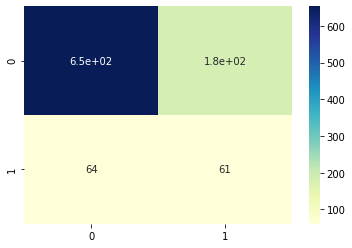

Accuracy: 0.7414330218068536


({'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_depth': None},
 array([[653, 185],
        [ 64,  61]]))

In [240]:
grid_search(X_new3,features,target,random_grid,"rf",6)

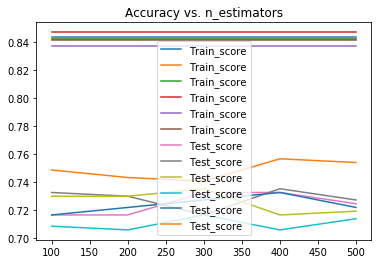

In [241]:
params_test(X_new3,features,target,"n_estimators",[100,200,300,400,500],"rf",6)

In [242]:
n_estimators = [100,200,400,500]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid16 = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.3min finished


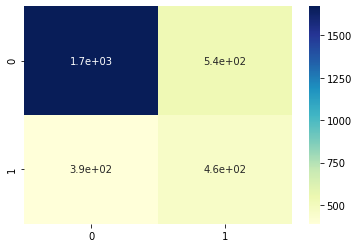

Accuracy: 0.6968606932635709


({'n_estimators': 500,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 10},
 array([[1671,  538],
        [ 389,  460]]))

In [243]:
grid_search(X_new2,features,target,random_grid16,"rf",3)